In [25]:
# Import our dependencies

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import our input dataset
df = pd.read_csv('Resources/dataset.csv')
df

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.640000,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.0,23.060250,0,Caucasian,M,177.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,66119,13486,121,0,56.0,47.179671,0,Caucasian,F,183.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,8981,58179,195,0,48.0,27.236914,0,Caucasian,M,170.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,33776,120598,66,0,NaN,23.297481,0,Caucasian,F,154.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [26]:
print(df.columns.values)

['encounter_id' 'patient_id' 'hospital_id' 'hospital_death' 'age' 'bmi'
 'elective_surgery' 'ethnicity' 'gender' 'height' 'hospital_admit_source'
 'icu_admit_source' 'icu_id' 'icu_stay_type' 'icu_type' 'pre_icu_los_days'
 'readmission_status' 'weight' 'albumin_apache' 'apache_2_diagnosis'
 'apache_3j_diagnosis' 'apache_post_operative' 'arf_apache'
 'bilirubin_apache' 'bun_apache' 'creatinine_apache' 'fio2_apache'
 'gcs_eyes_apache' 'gcs_motor_apache' 'gcs_unable_apache'
 'gcs_verbal_apache' 'glucose_apache' 'heart_rate_apache'
 'hematocrit_apache' 'intubated_apache' 'map_apache' 'paco2_apache'
 'paco2_for_ph_apache' 'pao2_apache' 'ph_apache' 'resprate_apache'
 'sodium_apache' 'temp_apache' 'urineoutput_apache' 'ventilated_apache'
 'wbc_apache' 'd1_diasbp_invasive_max' 'd1_diasbp_invasive_min'
 'd1_diasbp_max' 'd1_diasbp_min' 'd1_diasbp_noninvasive_max'
 'd1_diasbp_noninvasive_min' 'd1_heartrate_max' 'd1_heartrate_min'
 'd1_mbp_invasive_max' 'd1_mbp_invasive_min' 'd1_mbp_max' 'd1_mbp_mi

In [27]:
print(len(df))


91713


In [28]:
df = df.drop(['encounter_id', 'patient_id', 'hospital_id', 'apache_4a_icu_death_prob', 'apache_4a_hospital_death_prob'], axis=1)

In [ ]:
#searching for columns with large null value counts

In [29]:
col_names = []
nan_vals = []
for col in df.columns:
    col_names.append(col)
    nan_vals.append(df[col].isna().sum())

In [30]:
to_sort = {"names":col_names,"values":nan_vals}

In [32]:
nan_df = pd.DataFrame(to_sort).set_index("names").sort_values("values",ascending=False)

In [ ]:
nan_df

In [34]:
to_lose_df = [nan_df["values"] > 500]

In [36]:
print(to_lose_df)

[names
h1_bilirubin_max          True
h1_bilirubin_min          True
h1_lactate_min            True
h1_lactate_max            True
h1_albumin_max            True
                         ...  
icu_stay_type            False
icu_type                 False
readmission_status       False
apache_post_operative    False
hospital_death           False
Name: values, Length: 181, dtype: bool]


In [ ]:
# Starting logistic regression model

In [5]:

df.dropna(inplace=True)
        
X = df.drop('hospital_death', axis=1)
X = pd.get_dummies(X)
y = df['hospital_death'] != 1

In [6]:
X

,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,...,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Sepsis,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Undefined diagnoses
8286,67.0,28.146291,0,167.64,133,0.000000,0,79.10,2.1,113.0,...,0,0,0,1,1,0,0,0,0,0
8492,60.0,34.574559,0,177.80,133,0.047222,0,109.30,3.6,113.0,...,0,0,0,1,1,0,0,0,0,0
8717,66.0,25.775925,1,185.40,133,1.147222,0,88.60,1.5,308.0,...,0,1,0,0,0,0,0,0,0,1
8727,55.0,56.659238,0,162.60,133,0.127778,0,149.80,1.7,214.0,...,0,0,0,0,0,1,0,0,0,0
9235,21.0,22.180764,0,182.90,133,0.000000,0,74.20,3.2,113.0,...,0,0,0,1,1,0,0,0,0,0
9585,54.0,20.385384,0,172.70,133,0.000000,0,60.80,2.5,113.0,...,0,0,0,1,1,0,0,0,0,0
10101,83.0,33.246642,0,162.60,133,0.000000,0,87.90,2.2,114.0,...,0,0,0,0,1,0,0,0,0,0
10228,19.0,23.169473,0,175.30,133,0.000000,0,71.20,2.6,122.0,...,1,0,0,0,0,0,1,0,0,0
12850,53.0,30.750308,0,162.60,236,0.006944,0,81.30,2.0,114.0,...,0,0,0,0,1,0,0,0,0,0
17433,73.0,30.008090,0,172.70,267,4.200000,0,89.50,1.9,114.0,...,0,0,0,0,1,0,0,0,0,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.7142857142857143


In [9]:
feature_importances = clf.feature_importances_

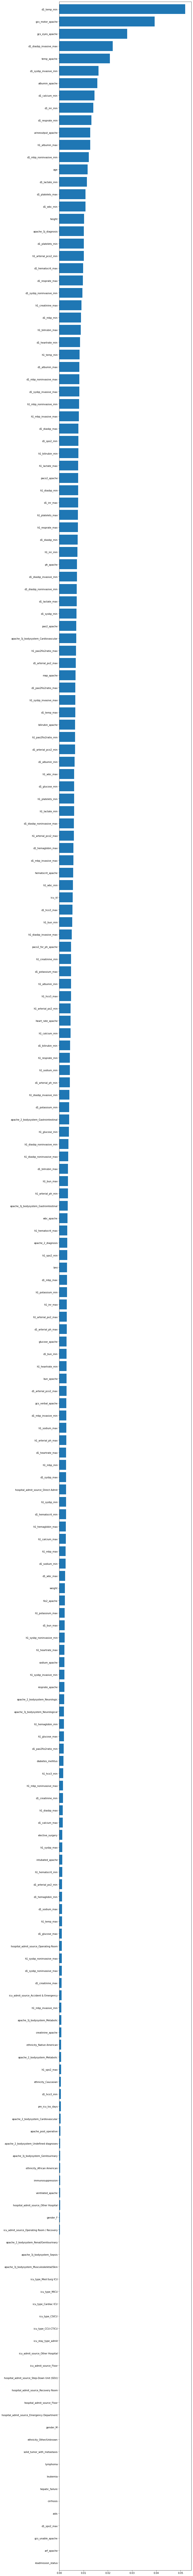

In [10]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [11]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=500,
                                                 random_state=1))

In [12]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

c:\Users\zacka\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [16]:
X_test_scaled.shape

(7, 208)

In [13]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.8571428571428571


In [14]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.7142857142857143
